# **Welcome to New York City! 🗽**

Getting into a taxi in an unfamiliar city can be nerve-wracking. You have no idea how much the trip should cost or if the driver is taking the most direct route. In New York City, taxi riders cannot get an advance estimate for taxi fares. The NYC Taxi and Limousine Commission’s official stance is that “it is impossible to pre-calculate a fare because the meter rate depends on traffic, construction, weather, and route to the destination.”

In New York City, taxicabs come in two varieties: yellow and green; they are widely recognizable symbols of the city. Taxis painted yellow (medallion taxis) are able to pick up passengers anywhere in the five boroughs. Green Boro Taxis, which operate in the outer boroughs and parts of Manhattan north of certain streets, can either be prearranged or hailed on the street. Both types have the same fare structure. Taxicabs are operated by private companies and licensed by the (TLC).

Code source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Import the data

In [ ]:
# to show all columns
pd.set_option ('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/taxi_tripdata.csv', low_memory=False)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


Below are the details of each variable

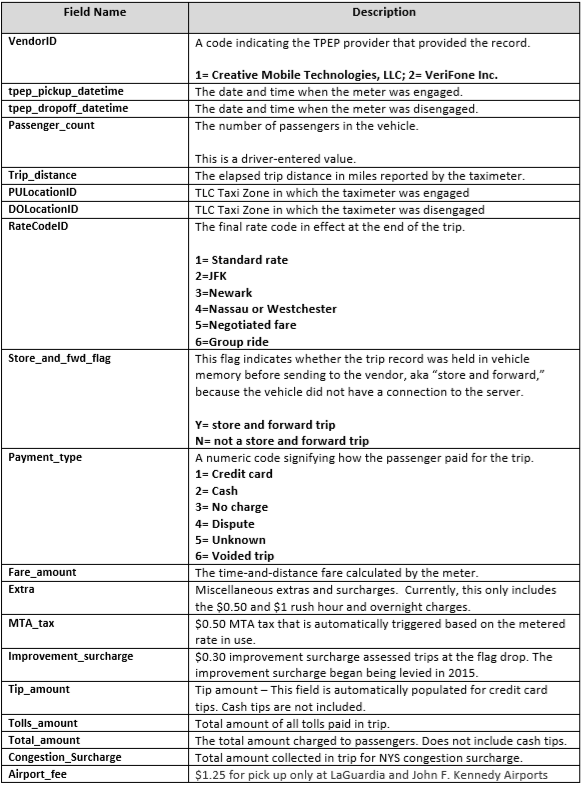

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
df.isnull().sum()

VendorID                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64

It looks like there are some null values. Let's check it further.

In [ ]:
df[df.isna().any(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


It seems like all samples have unknown values in the ehail_fee column. And there are 32518 samples that have unknown values in some columns, which are necessary in this regard, and they all have unknown values in the same columns as well. Therefore, we shall delete those samples who have unknown values in some columns.

In [ ]:
df = df.drop(columns='ehail_fee')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51173 entries, 0 to 51172
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   51173 non-null  object 
 2   lpep_dropoff_datetime  51173 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           51173 non-null  int64  
 6   DOLocationID           51173 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          51173 non-null  float64
 9   fare_amount            51173 non-null  float64
 10  extra                  51173 non-null  float64
 11  mta_tax                51173 non-null  float64
 12  tip_amount             51173 non-null  float64
 13  tolls_amount           51173 non-null  float64
 14  improvement_surcharge  51173 non-null  float64
 15  to

In [ ]:
# Change the store_and_fwd_flag which is a categorical variable into a numerical variable
# that can represent their own category
le = LabelEncoder()
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])

In [ ]:
# Generating new columns from extracting information from the pickup and dropoff datetime columns
temp = df.copy()
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
temp['year'] = df['lpep_pickup_datetime'].dt.year
temp['month'] = df['lpep_pickup_datetime'].dt.month
temp['weekday'] = df['lpep_pickup_datetime'].dt.weekday
temp['length_of_trip_in_minute'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
temp.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,weekday,length_of_trip_in_minute
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,0,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,2021,7,3,4.733333
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,0,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,2021,7,3,35.916667
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,0,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,2021,7,3,6.033333
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,0,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,2021,7,3,5.716667
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,0,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,2021,7,3,7.233333


In [ ]:
temp['year'].unique()

array([2021, 2009, 2008])

In [ ]:
temp['year'].value_counts()

2021    51168
2009        4
2008        1
Name: year, dtype: int64

Since there are only 5 samples that are not in 2021, it is better to delete those samples since it is too far from 2021.

In [ ]:
temp = temp.loc[~(temp['year']==2008)&~(temp['year']==2009)]

In [ ]:
temp['year'].value_counts()

2021    51168
Name: year, dtype: int64

Now, we only have data from 2021. Next, we would have to delete the pickup and dropoff datetime columns since we already have those new columns containing information about the date and time

In [ ]:
temp = temp.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])

# Split the data

In [ ]:
# Define X and y variables
X = temp.drop(columns='total_amount')
y = temp['total_amount']

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
numeric_columns = np.array(X_train.columns)
numeric_columns

array(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'payment_type', 'trip_type',
       'congestion_surcharge', 'year', 'month', 'weekday',
       'length_of_trip_in_minute'], dtype=object)

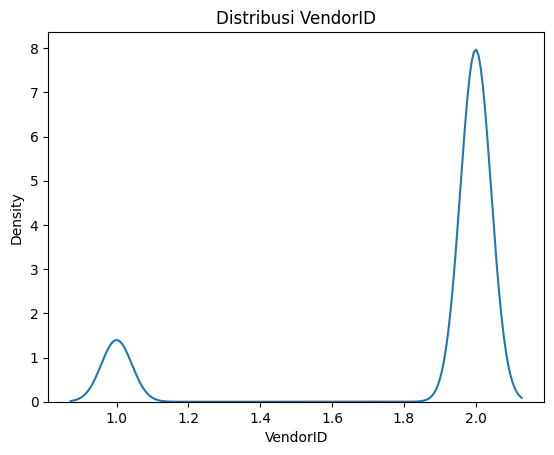

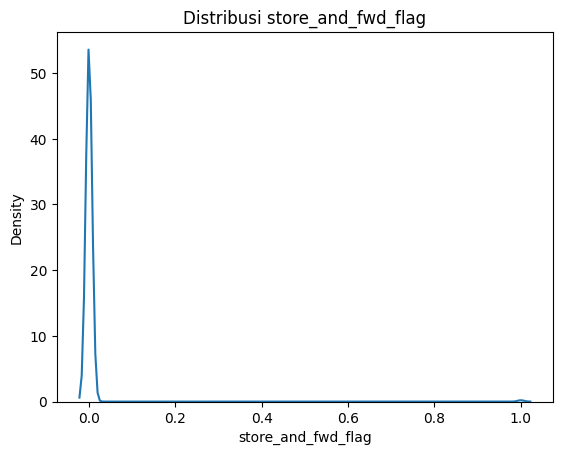

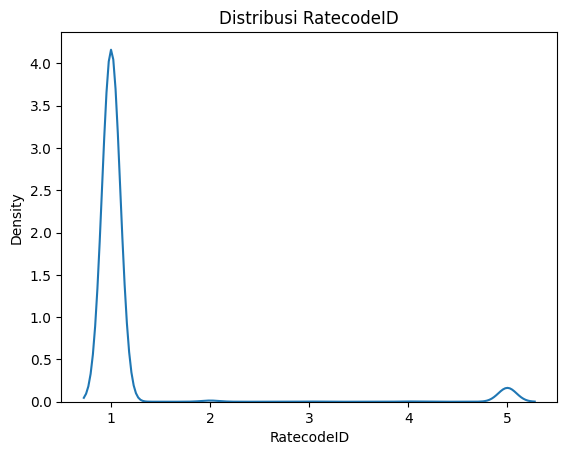

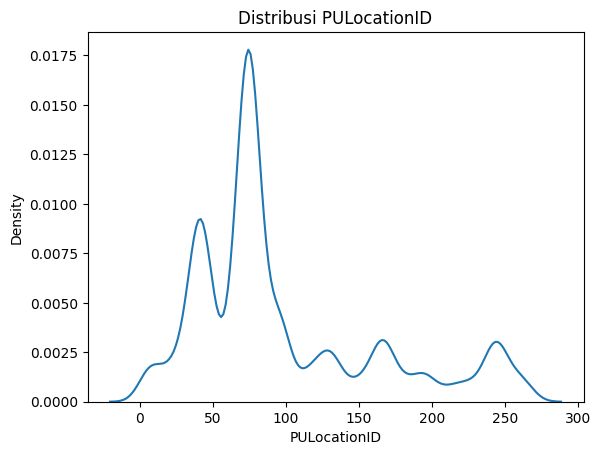

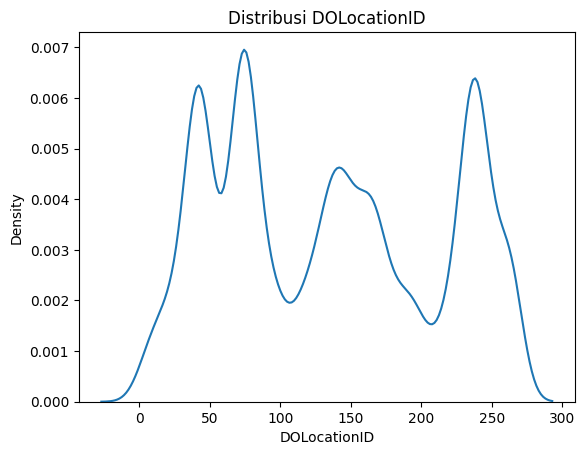

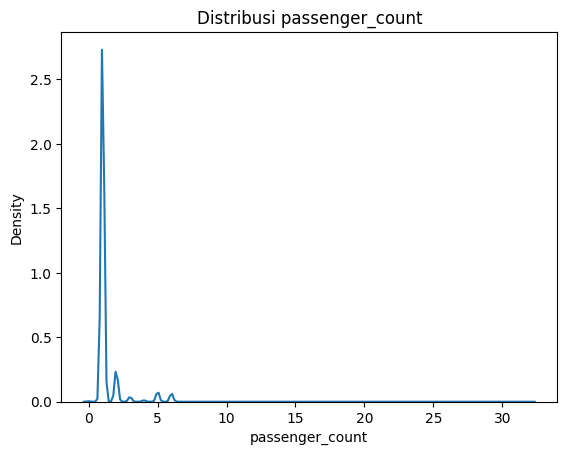

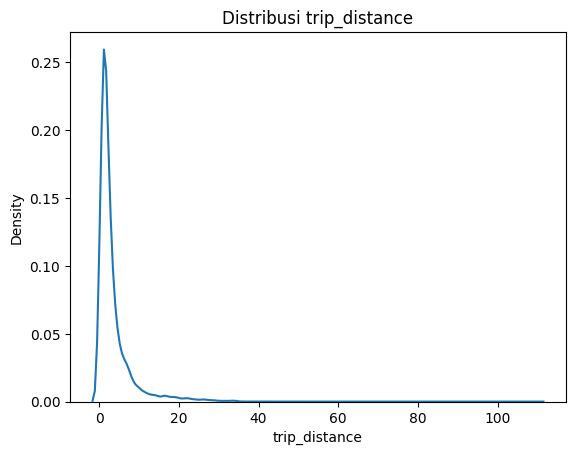

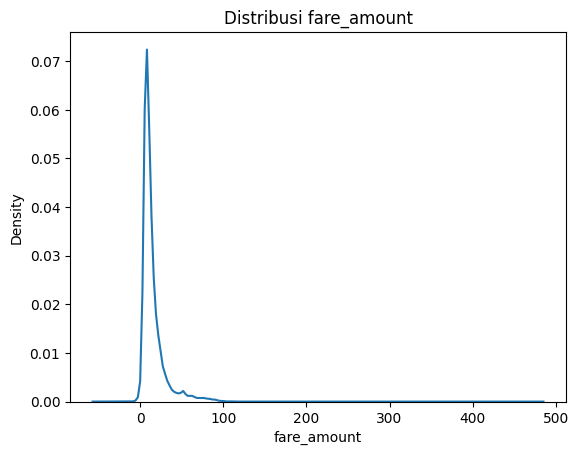

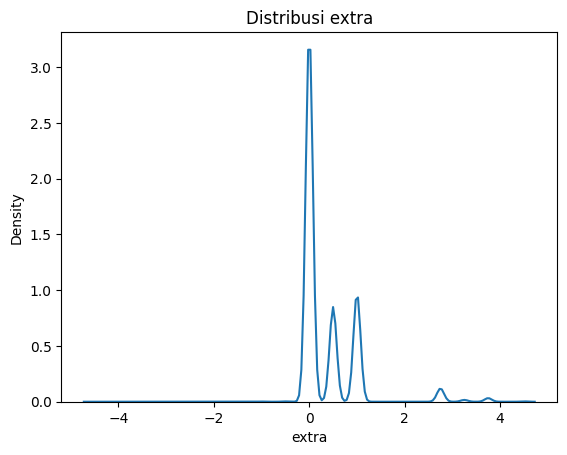

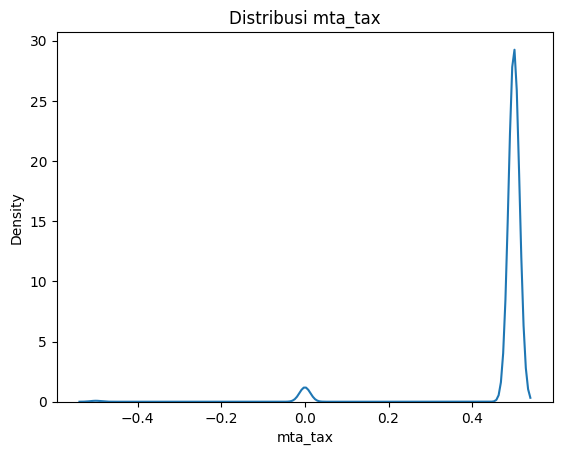

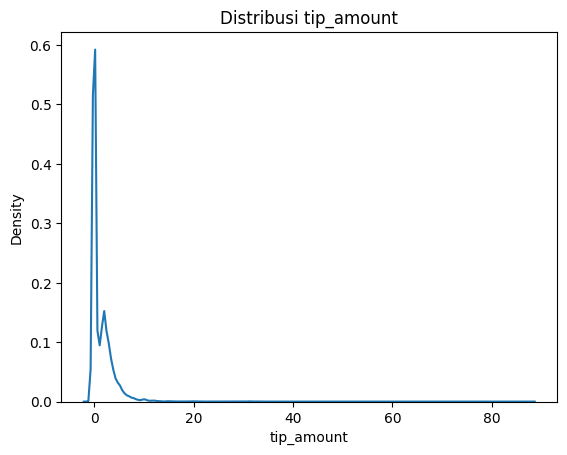

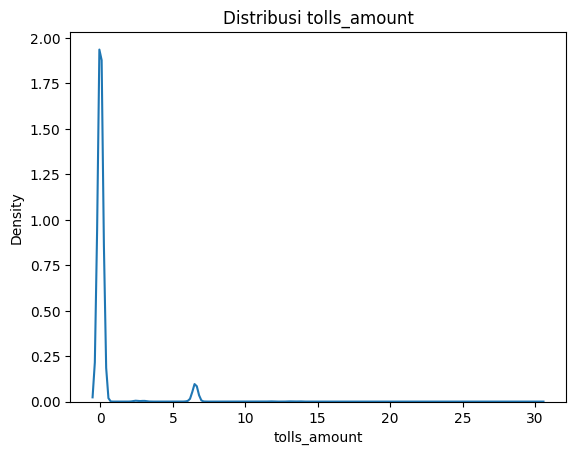

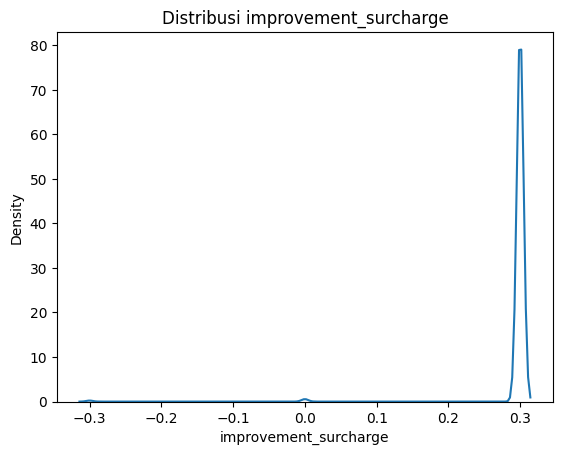

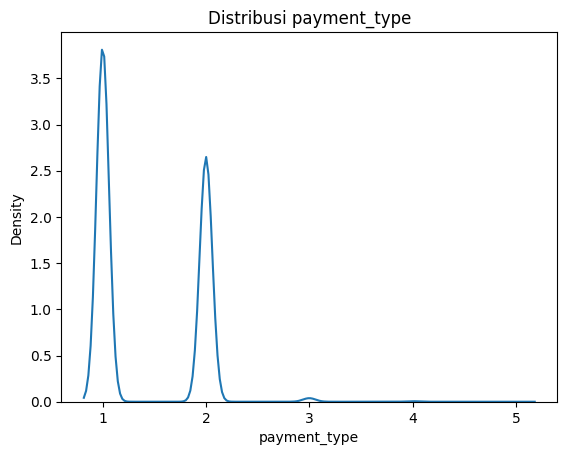

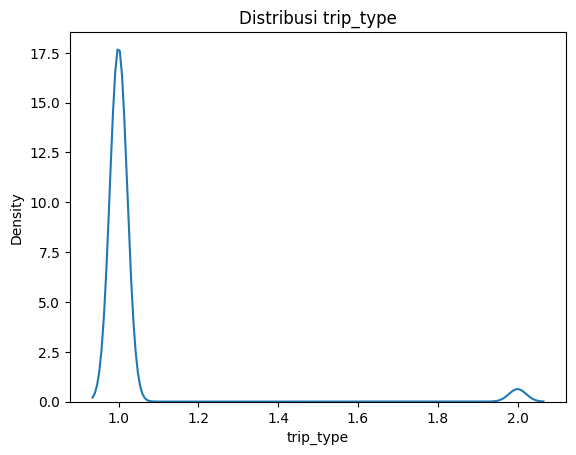

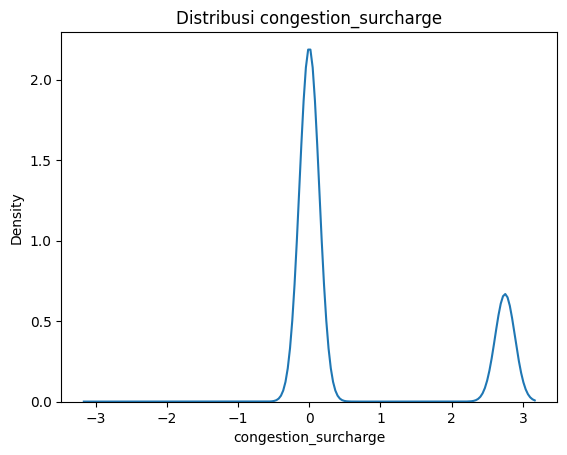

<ipython-input-149-017be5c181c6>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[column])


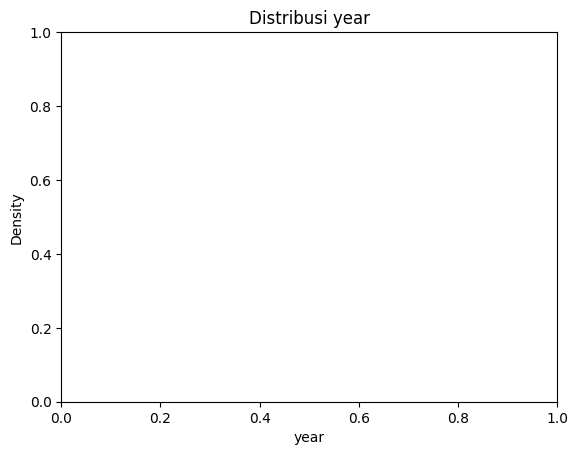

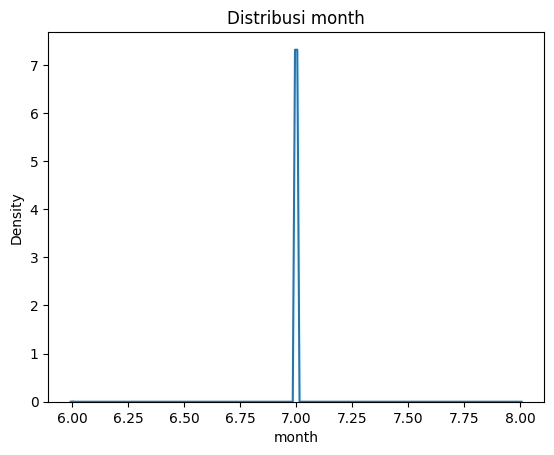

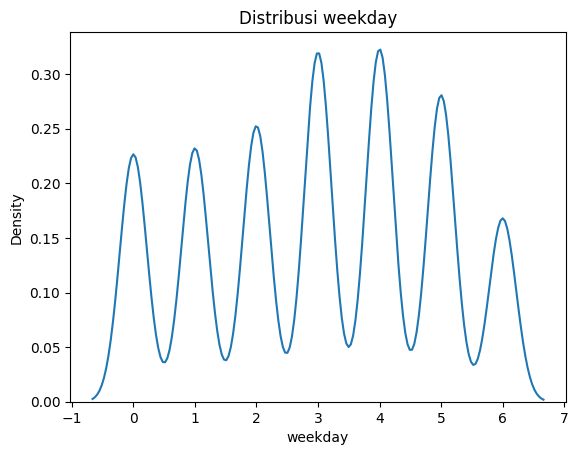

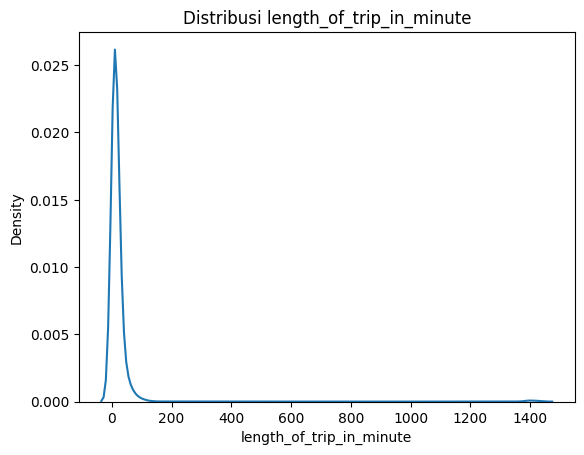

In [ ]:
# Checking the distribution of each numerical columns
for column in numeric_columns:
  sns.kdeplot(X_train[column])
  plt.title("Distribusi {}".format(column))
  plt.xlabel("{}".format(column))
  plt.ylabel("Density")
  plt.show()

All variables are not normally distributed

# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept coefficient : ",model.intercept_)
pd.DataFrame({"variable":X_train.columns,"coefficient":model.coef_})

Intercept coefficient :  -0.8225786177049237


,variable,coefficient
0,VendorID,0.347656
1,store_and_fwd_flag,0.085467
2,RatecodeID,0.046023
3,PULocationID,0.000081
4,DOLocationID,-0.000012
5,passenger_count,0.013983
6,trip_distance,-0.007284
7,fare_amount,1.001669
8,extra,0.499823
9,mta_tax,1.770086


In [ ]:
# Calculate the RMSE of training and test sets
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 0.28584420744263767
RMSE pada data test  : 0.2790144151301903


In [ ]:
lr_score = r2_score(y_test, test_prediction)
print(lr_score)

0.9997067643468461


# Feature Scaling (the target variable is not scaled)


In [ ]:
sc_X = StandardScaler()
X_train.iloc[:, 2:] = sc_X.fit_transform(X_train.iloc[:, 2:])
X_test.iloc[:, 2:] = sc_X.transform(X_test.iloc[:, 2:])

<ipython-input-35-25fb9226273e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.iloc[:, 2:] = sc_X.fit_transform(X_train.iloc[:, 2:])
<ipython-input-35-25fb9226273e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.iloc[:, 2:] = sc_X.transform(X_test.iloc[:, 2:])


# Decision Tree Regression

In [ ]:
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
regressor.predict(X_test)

array([ 0.  ,  7.3 , 24.8 , ...,  8.8 , 13.8 , 40.26])

In [ ]:
# Calculate the RMSE of training and test sets
train_prediction = regressor.predict(X_train)
test_prediction = regressor.predict(X_test)

def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 2.2042506349717558e-14
RMSE pada data test  : 1.5271343266113042


In [ ]:
r2_score(y_test, test_prediction)

0.9912154813618846

# Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42) # each tree is an estimator
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
regressor.predict(X_test)

array([ 0.   ,  7.3  , 24.8  , ...,  8.8  , 13.8  , 39.846])

In [ ]:
# Calculate the RMSE of training and test sets
train_prediction = regressor.predict(X_train)
test_prediction = regressor.predict(X_test)

def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 0.39535104476931004
RMSE pada data test  : 1.3344464167962586


In [ ]:
r2_score(y_test, test_prediction)

0.9932924214095502

# Feature Scaling (target variable is also scaled)


In [ ]:
y_train = y_train.values
y_train

array([ 9.36,  9.36, 29.05, ..., 16.8 ,  7.3 , 11.62])

In [ ]:
y_train = y_train.reshape(len(y_train), 1)
y_train

array([[ 9.36],
       [ 9.36],
       [29.05],
       ...,
       [16.8 ],
       [ 7.3 ],
       [11.62]])

In [ ]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train.iloc[:, 2:] = sc_X.fit_transform(X_train.iloc[:, 2:])
X_test.iloc[:, 2:] = sc_X.transform(X_test.iloc[:, 2:])
y_train = sc_Y.fit_transform(y_train)

<ipython-input-137-a59b3bdb05f1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.iloc[:, 2:] = sc_X.fit_transform(X_train.iloc[:, 2:])
<ipython-input-137-a59b3bdb05f1>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.iloc[:, 2:] = sc_X.transform(X_test.iloc[:, 2:])


# Decision Tree Regression

In [ ]:
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_prediction = sc_Y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
train_prediction = train_prediction.flatten()
train_prediction = train_prediction.tolist()

In [ ]:
test_prediction = sc_Y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
test_prediction = test_prediction.flatten()
test_prediction = test_prediction.tolist()

In [ ]:
y_train = sc_Y.inverse_transform(y_train.reshape(-1,1))
y_train = y_train.flatten()
y_train = y_train.tolist()

In [ ]:
# RMSE function
def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

In [ ]:
y_train = pd.Series(y_train)
y_train

0         9.36
1         9.36
2        29.05
3        33.30
4        41.30
         ...  
40929    23.30
40930     9.75
40931    16.80
40932     7.30
40933    11.62
Length: 40934, dtype: float64

In [ ]:
print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 2.4754298522256295e-14
RMSE pada data test  : 1.4623162716214901


In [ ]:
dtr_score = r2_score(y_test, test_prediction)
print(dtr_score)

0.9919453603579012


# Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42) # each tree is an estimator
regressor.fit(X_train, y_train)

<ipython-input-93-baef9caefa21>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
train_prediction = sc_Y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
train_prediction = train_prediction.flatten()
train_prediction = train_prediction.tolist()

In [ ]:
test_prediction = sc_Y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
test_prediction = test_prediction.flatten()
test_prediction = test_prediction.tolist()

In [ ]:
y_train = sc_Y.inverse_transform(y_train.reshape(-1,1))
y_train = y_train.flatten()
y_train = y_train.tolist()

In [ ]:
# RMSE function
def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

In [ ]:
y_train = pd.Series(y_train)
y_train

0         9.36
1         9.36
2        29.05
3        33.30
4        41.30
         ...  
40929    23.30
40930     9.75
40931    16.80
40932     7.30
40933    11.62
Length: 40934, dtype: float64

In [ ]:
print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 0.3620741832808125
RMSE pada data test  : 1.3005454434050128


In [ ]:
rfr_score = r2_score(y_test, test_prediction)
print(rfr_score)

0.993628898063268


# Support Vector Regressor

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
train_prediction = sc_Y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
train_prediction = train_prediction.flatten()
train_prediction = train_prediction.tolist()

In [ ]:
test_prediction = sc_Y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
test_prediction = test_prediction.flatten()
test_prediction = test_prediction.tolist()

In [ ]:
y_train = sc_Y.inverse_transform(y_train.reshape(-1,1))
y_train = y_train.flatten()
y_train = y_train.tolist()

In [ ]:
# RMSE function
def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

In [ ]:
y_train = pd.Series(y_train)
y_train

0         9.36
1         9.36
2        29.05
3        33.30
4        41.30
         ...  
40929    23.30
40930     9.75
40931    16.80
40932     7.30
40933    11.62
Length: 40934, dtype: float64

In [ ]:
print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 3.6433079266533284
RMSE pada data test  : 2.9931997457475044


In [ ]:
svr_score = r2_score(y_test, test_prediction)
print(svr_score)

0.9662530219166398


# LightGBM Regressor

In [ ]:
regressor = LGBMRegressor()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:295: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1508
[LightGBM] [Info] Number of data points in the train set: 40934, number of used features: 18
[LightGBM] [Info] Start training from score 0.000000


LGBMRegressor()

In [ ]:
train_prediction = sc_Y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
train_prediction = train_prediction.flatten()
train_prediction = train_prediction.tolist()

In [ ]:
test_prediction = sc_Y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
test_prediction = test_prediction.flatten()
test_prediction = test_prediction.tolist()

In [ ]:
y_train = sc_Y.inverse_transform(y_train.reshape(-1,1))
y_train = y_train.flatten()
y_train = y_train.tolist()

In [ ]:
# RMSE function
def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

In [ ]:
y_train = pd.Series(y_train)
y_train

0         9.36
1         9.36
2        29.05
3        33.30
4        41.30
         ...  
40929    23.30
40930     9.75
40931    16.80
40932     7.30
40933    11.62
Length: 40934, dtype: float64

In [ ]:
print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 1.7552442794609613
RMSE pada data test  : 1.6268649768310728


In [ ]:
lgb_score = r2_score(y_test, test_prediction)
print(lgb_score)

0.9900306576592384


# XGBoost Regressor

In [ ]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
train_prediction = sc_Y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
train_prediction = train_prediction.flatten()
train_prediction = train_prediction.tolist()

In [ ]:
test_prediction = sc_Y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
test_prediction = test_prediction.flatten()
test_prediction = test_prediction.tolist()

In [ ]:
y_train = sc_Y.inverse_transform(y_train.reshape(-1,1))
y_train = y_train.flatten()
y_train = y_train.tolist()

In [ ]:
# RMSE function
def RMSE(actual,prediction):
    error = actual-prediction
    rmse = sqrt(sum(error**2)/len(error))
    return rmse

In [ ]:
y_train = pd.Series(y_train)
y_train

0         9.36
1         9.36
2        29.05
3        33.30
4        41.30
         ...  
40929    23.30
40930     9.75
40931    16.80
40932     7.30
40933    11.62
Length: 40934, dtype: float64

In [ ]:
print("RMSE pada data train :" , RMSE(y_train,train_prediction))
print("RMSE pada data test  :" , RMSE(y_test,test_prediction))

RMSE pada data train : 0.16814840860739477
RMSE pada data test  : 1.1162276146821641


In [ ]:
xgb_score = r2_score(y_test, test_prediction)
print(xgb_score)

0.9953068005075558


Since it is better to also scale the target variable, we will just compare linear regression model with other models where the target variable is also scaled

In [ ]:
# Show all r2 score from the models
print("R^2 score of:")
print("Linear Regression : ", lr_score)
print("Decision Tree Regression : ", dtr_score)
print("Random Forest Regression : ", rfr_score)
print("Support Vector Regressor : ", svr_score)
print("LightGBM Regressor : ", lgb_score)
print("XGBoost Regressor : ", xgb_score)

R^2 score of:
Linear Regression :  0.9997067643468461
Decision Tree Regression :  0.9919453603579012
Random Forest Regression :  0.993628898063268
Support Vector Regressor :  0.9662530219166398
LightGBM Regressor :  0.9900306576592384
XGBoost Regressor :  0.9953068005075558


It is shown that linear regression model has the highest score of R^2. However, the RMSE score for the test is slightly lower than the RMSE score for the train using the linear regression model. Since it is not overly higher than the RMSE score for the train, it can still be considered as the best model for predicting the total amount fare.